### Open ai 사용하여 긍정 부정 예측하기

In [1]:
# open ai 연결하기

In [5]:
import openai

In [6]:
from getpass import getpass

openai_api_key = getpass("OPEN API KEY")

OPEN API KEY ········


In [7]:
from openai import OpenAI
client = OpenAI(api_key = openai_api_key)

In [8]:
def print_streaming_response(response):
    for chunk in response:
        delta = chunk.choices[0].delta
        if delta.content:
            print(delta.content, end="")

In [9]:
messages = [{"role": "user", "content": "안녕하세요"}]
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    stream=True
)
print_streaming_response(response)

안녕하세요! 어떻게 도와드릴까요?

In [48]:
# 프롬프트 역할부여하기

In [148]:
def request_chat_completion(prompt):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "당신은 고객 리뷰 전문 분석가입니다."},
            {"role": "user", "content": prompt}
        ],
        stream = False
    )
    return response.choices[0].message.content

In [149]:
request_chat_completion(prompt)

'중립'

In [145]:
print(response.choices[0].message.content)

중립


In [ ]:
def response_edditor(response):
    

In [142]:
def generate_prompt(review):
    prompt = f"""
다음 식당의 리뷰 리스트를 줄거야. 고객의 감정을 문맥을 파악해서 대답해.
대답은 다른 추가적인 설명 없이 '긍정'인 경우 '1', 중립은 '0','부정'은 '-1'로 대답해줘.

---
리뷰: {review}
---
""".strip()
    return prompt

In [123]:
# 테스트

In [143]:
prompt = generate_prompt(
    review= df["review_text"][2]
)

In [147]:
response = request_chat_completion(prompt)

In [177]:
# 100개 테스트 샘플
df_review = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_review_first_preprocessed.csv")

df_review_sample = df_review[1301:]

def reviewloader():
    results = []
    for index, row in df_review_sample.iterrows():
        review = row["review_text"]
        prompt = generate_prompt(review)
        sentiment = request_chat_completion(prompt)
        results.append(sentiment.strip())
    return results

In [178]:
sentiments = reviewloader()

In [179]:
df_review_sample['sentiment'] = sentiments

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_21358/3454683992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_sample['sentiment'] = sentiments


In [180]:
df_review_sample.to_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_review_with_sentiment5.csv", index=False)

### KAKAO 긍정부정분석 전처리

In [61]:
import pandas as pd

df = pd.read_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_reviews_second_preprocessed.csv")

In [62]:
df_A= df.drop(["user_star2"],axis =1)

In [63]:
df_A

,platform,store_name,review_text,user_star,review_date,sentiment
0,kakao_map,홍콩반점0410 가산디지털단지 역점,맛도 서비스도 매우만족임,5,2024-04-14 00:00:00,1
1,kakao_map,홍콩반점0410 대흥역점,방문해서 먹었는데 탕수육이 진짜 맛있네요 부드러우면서 쫄깃했어요,4,2024-08-04 00:00:00,1
2,kakao_map,홍콩반점0410 대흥역점,탕수육 쟁반짜장 고추짬뽕,5,2024-07-29 00:00:00,중립
3,kakao_map,홍콩반점0410 대흥역점,"짜장이 묽은 편이에요. 일반 짜장과 고기 짜장, 짬뽕밥 주문했는데 짜장은..흠......",2,2024-07-28 00:00:00,0
4,kakao_map,홍콩반점0410 대흥역점,NaN,5,2024-07-25 00:00:00,중립
...,...,...,...,...,...,...
1688,kakao_map,홍콩반점0410 영등포역점,여긴 주방장도 알바씁니까? 맨정신으로 어떻게 이딴 음식을 내줄수 있는건지 모르겠네 ...,1,2020-01-18,0
1689,kakao_map,홍콩반점0410 영등포역점,홍콩반점 좋아하는데 여러지점중 제일 별로였어요 면은 불었고 짜장은 산도가 있는맛 3...,2,2019-09-26,0
1690,kakao_map,홍콩반점0410 영등포역점,NaN,5,2019-02-04,중립
1691,kakao_map,홍콩반점0410 영등포역점,서빙하시는 남자분 키는 조금 작지만 귀여운 외모에 완전 친절하심.,5,2019-01-07,1


In [64]:
df_A.loc[:100, 'review_date'] = pd.to_datetime(df_A.loc[:100, 'review_date'], errors='coerce', format='%Y-%m-%d %H:%M:%S').dt.date

In [65]:
df_A.loc[(df_A['sentiment']=='긍정'),'sentiment']='1'

In [66]:
df_A.loc[(df_A['sentiment']=='중립'),'sentiment']='0'

In [67]:
df_A.loc[(df_A['sentiment']=='0'),'sentiment']='-1'

In [68]:
# 중립으로 표기되고, 리뷰텍스트가 없는데 별점이 5점인 것
df_A.loc[(df_A['sentiment']== '0') & (df_A['review_text'].isna()) & (df_A['user_star']==5),'sentiment']='1'

In [69]:
# 중립으로 표기되고, 리뷰텍스트가 없는데 별점이 4점인 것
df_A.loc[(df_A['sentiment']== '0') & (df_A['review_text'].isna()) & (df_A['user_star']>3),'sentiment']='1'

In [70]:
# 중립으로 표기되고, 리뷰텍스트가 없는데 별점이 3점 미만인 것
df_A.loc[(df_A['sentiment']=='0')&(df_A['review_text'].isna()) &(df_A['user_star']<3),'sentiment']='0'

In [71]:
# 중립으로 표기되고, 리뷰텍스트가 있는데, 별점이 3점 미만인 것
df_A.loc[(df_A['sentiment']=='0')&(df_A['review_text'].notna()) &(df_A['user_star']<3),'sentiment']='0'

In [72]:
# 긍정으로 표기되고, 별점이 3점 미만인 곳 (비꼬는 리뷰)
df_A.loc[(df_A['sentiment']=='1')&(df_A['user_star']<3),'sentiment']='0'

In [73]:
pd.set_option('display.max_rows', None)

In [74]:
# 중립으로 표시되고 별점이 3점미만인 것 > 부정
df_A.loc[(df_A['sentiment']=='0')&(df_A['user_star']<4),'sentiment']="-1"

In [75]:
df_A.loc[[1648,1580,1557,1538,1491,1488,1484,1417,1411,1397,1183,1165,1127,1100,898], 'sentiment'] = '1'

In [76]:
df_A.loc[[1649,1471,1466,1252,1036,1184,656,372,1655,890,1172,607,385,24], 'sentiment'] = '1'

In [77]:
df_A['review_length'] = df_A['review_text'].str.len()

In [78]:
df_A['review_length'].max()

1658.0

In [79]:
df_A['review_length'].describe()

count    1489.000000
mean       71.749496
std        90.055052
min         1.000000
25%        21.000000
50%        47.000000
75%        89.000000
max      1658.000000
Name: review_length, dtype: float64

In [80]:
df_A = df_A.rename(columns={'sentiment': 'classification_result'})

In [82]:
df_A.to_csv("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/data/kakao_thired_preprocessed.csv", index=False)

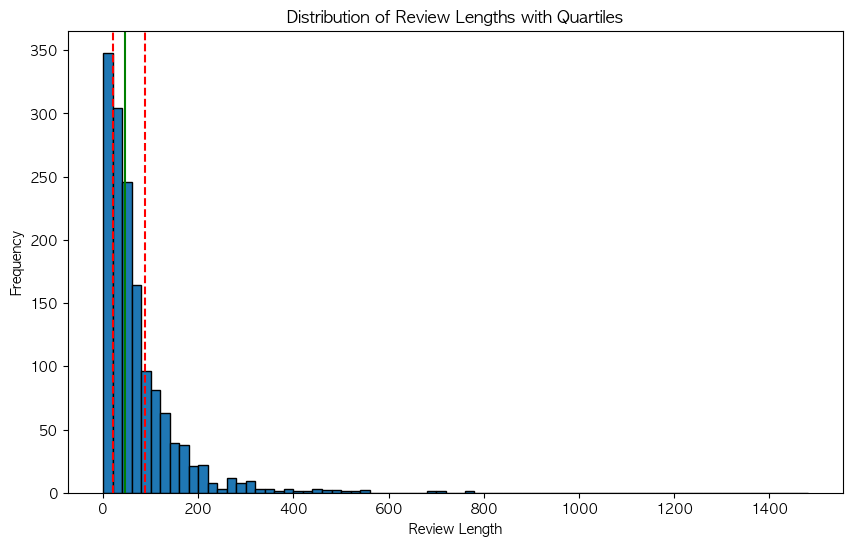

In [50]:
# 리뷰 길이분포
import matplotlib.pyplot as plt
import numpy as np

#사분위 수 계산
q1 = df_A['review_length'].quantile(0.25)
median = df_A['review_length'].median()
q3 = df_A['review_length'].quantile(0.75)


plt.figure(figsize=(10, 6))
plt.hist(df_A['review_length'].dropna(), bins=np.arange(0,1500,20), edgecolor='black')

# 사분위수 선 그리기
plt.axvline(q1, color='red', linestyle='--', linewidth=1.5, label=f'Q1: {q1}')
plt.axvline(median, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median}')
plt.axvline(q3, color='red', linestyle='--', linewidth=1.5, label=f'Q3: {q3}')

plt.title('Distribution of Review Lengths with Quartiles')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

### 빅쿼리 연동해서 EDA

In [36]:
#bigquery 연동하기 
from google.oauth2 import service_account
from google.cloud import bigquery

In [37]:
credentials = service_account.Credentials.from_service_account_file("/Users/nuri.park/Desktop/multicampus/data_analytics_camp_9th/Nuri_project_folder/semi_project_2_0808/kakaomap_review_crawling/team-project.json")

In [38]:
credentials

In [39]:
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [40]:
client

In [41]:
# 카카오_네이버_구글 병합자료
sql= """
WITH KNG_same_columns_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    classification_result
  FROM `team-project-432503.review_data.google_hongkong_reviews_final` AS GRF

  UNION ALL

  SELECT 
    platform,
    store_name,
    review_text,
    classification_result
  FROM `team-project-432503.review_data.naver_review_final` AS NRF

)
SELECT 
    platform,
    store_name,
    review_text,
    classification_result
FROM KNG_same_columns_combined
GROUP BY
    platform,
    store_name,
    review_text,
    classification_result
"""

In [42]:
KNG_same_columns_combined_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [43]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [44]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [45]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [46]:
KNG_same_columns_combined_df.loc[KNG_same_columns_combined_df['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [47]:
KNG_same_columns_combined_df["store_name"] = KNG_same_columns_combined_df["store_name"].str.replace("홍콩반점0410 ", "", regex=False)

In [48]:
KNG_same_columns_combined_df['store_name'].nunique()

90

In [49]:
# 유니크한 store_name 값을 가져옴
unique_store_names = KNG_same_columns_combined_df['store_name'].unique()

# 유니크한 값들을 ㄱㄴㄷ 순으로 정렬
sorted_unique_store_names = sorted(unique_store_names)

In [50]:
# 카카오_구글_별점 병합자료
sql= """
WITH KG_user_star_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    user_star,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    user_star,
    classification_result
  FROM `team-project-432503.review_data.google_hongkong_reviews_final` AS GRF
)
SELECT 
    platform,
    store_name,
    review_text,
    user_star,
    classification_result
FROM KG_user_star_combined
GROUP BY
      platform,
    store_name,
    review_text,
    user_star,
    classification_result
"""

In [51]:
KG_user_star_combined_df = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [52]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [53]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [54]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [55]:
KG_user_star_combined_df.loc[KG_user_star_combined_df['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [56]:
pd.set_option('display.expand_frame_repr', False)  # 열이 화면 너비를 초과할 때 데이터프레임을 줄 바꿈하지 않도록 설정

In [57]:
# 카카오_네이버_별점 병합자료
sql= """
WITH KN_review_date_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.naver_review_final` AS NRF
)
SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
FROM KN_review_date_combined

WHERE
    review_date > DATE('2024-06-03')
    
GROUP BY
      platform,
    store_name,
    review_text,
    review_date,
    classification_result


    
"""

In [58]:
after_KN_review_date_combined = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [59]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [60]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [61]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [62]:
after_KN_review_date_combined.loc[after_KN_review_date_combined['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [63]:
after_KN_review_date_combined["store_name"] = after_KN_review_date_combined["store_name"].str.replace("홍콩반점0410 ", "", regex=False)

In [64]:
# 카카오_네이버_별점 병합자료
sql= """
WITH KN_review_date_combined AS (
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.kakao_review_final` AS KRF
  
  UNION ALL
  
  SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
  FROM `team-project-432503.review_data.naver_review_final` AS NRF
)
SELECT 
    platform,
    store_name,
    review_text,
    review_date,
    classification_result
FROM KN_review_date_combined

WHERE
    review_date < DATE('2024-06-03')
    
GROUP BY
      platform,
    store_name,
    review_text,
    review_date,
    classification_result    
"""

In [65]:
before_KN_review_date_combined = client.query(sql).to_dataframe()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [66]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 가산디지털단지 역점', 'store_name'] = '홍콩반점0410 가산디지털단지역점'

In [67]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 양천구청점점', 'store_name'] = '홍콩반점0410 양천구청점'

In [68]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 목동 파리공원점', 'store_name'] = '홍콩반점0410 목동파리공원점'

In [69]:
before_KN_review_date_combined.loc[before_KN_review_date_combined['store_name'] == '홍콩반점0410 문배지점', 'store_name'] = '홍콩반점0410 용산문배점'

In [70]:
before_KN_review_date_combined["store_name"] = before_KN_review_date_combined["store_name"].str.replace("홍콩반점0410 ", "", regex=False)

<Axes: xlabel='count', ylabel='store_name'>

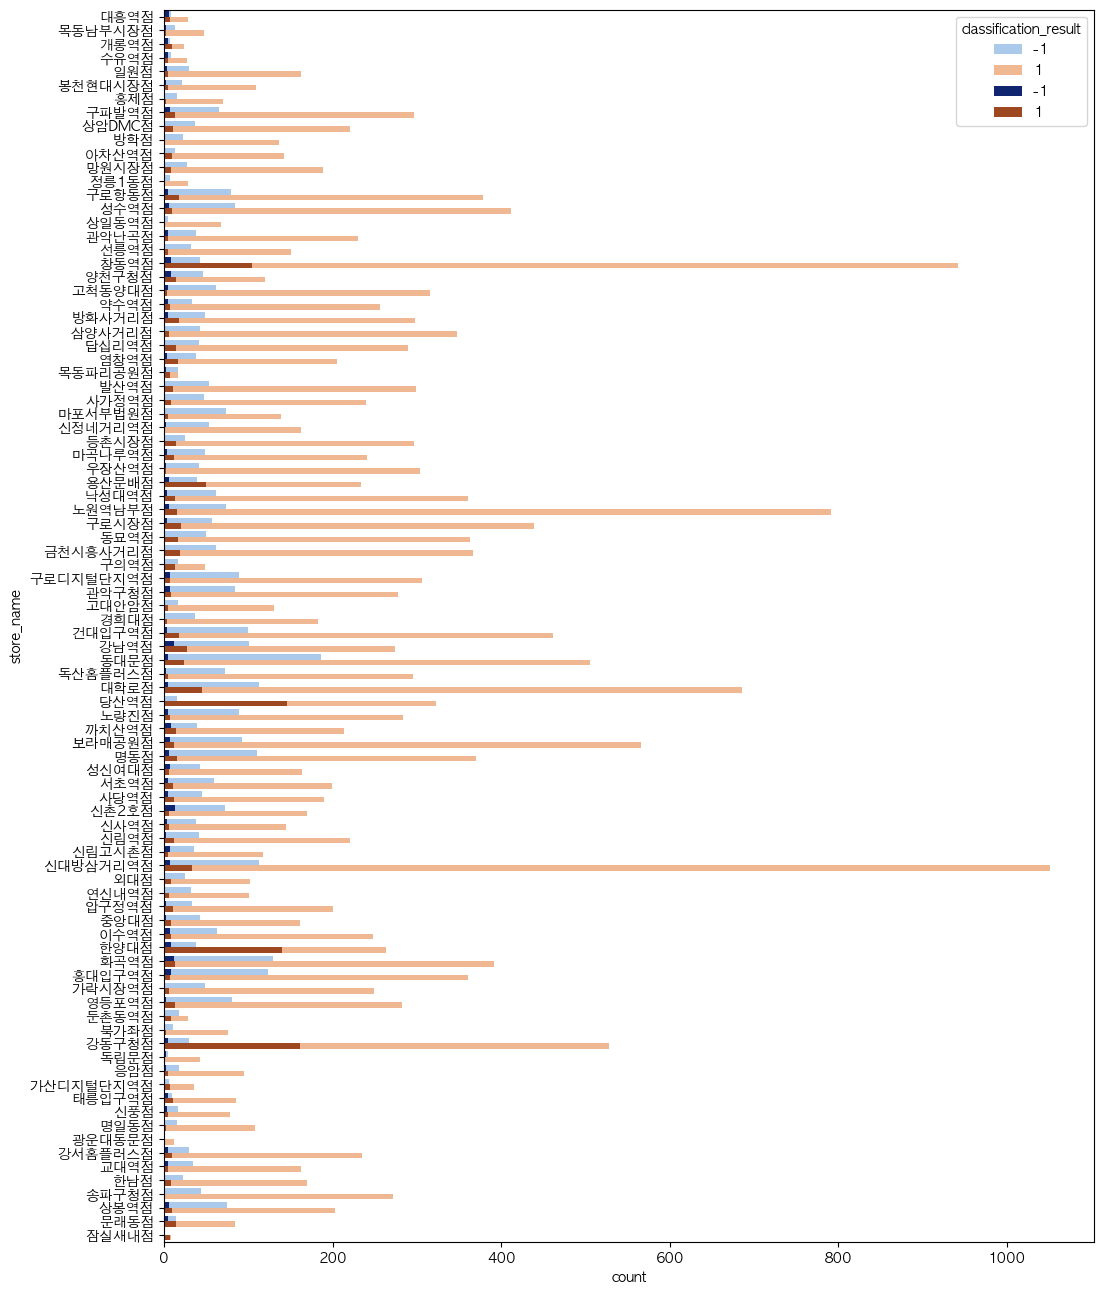

In [71]:
#별점 별 감정분포
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(12, 16))
sns.countplot(
    y = "store_name",
    palette = "pastel",
    hue = "classification_result",
    data = before_KN_review_date_combined
)

sns.countplot(
    y = "store_name",
    palette = "dark",
    hue = "classification_result",
    data = after_KN_review_date_combined
)

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1338/1251141781.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change.values, y=change.index, palette="coolwarm")


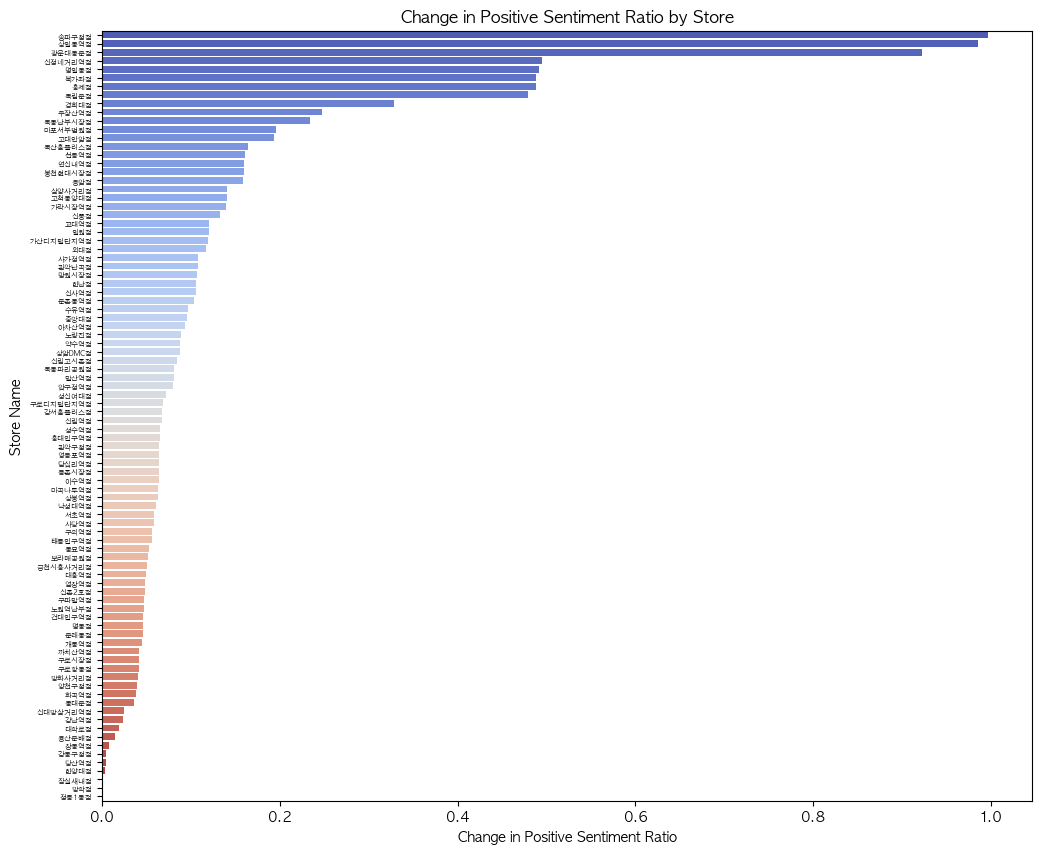

발전된 가게 (상위 5개):
store_name
송파구청점      0.996835
상일동역점      0.985915
광운대동문점     0.923077
신정네거리역점    0.495349
명일동점       0.491870
Name: positive_ratio, dtype: float64

지지부진한 가게 (하위 5개):
store_name
당산역점     0.003882
한양대점     0.003434
잠실새내점    0.000000
방학점           NaN
정릉1동점         NaN
Name: positive_ratio, dtype: float64


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성 (실제 데이터로 대체해야 함)
before_data = before_KN_review_date_combined
after_data = after_KN_review_date_combined

# 각 가게별, 감정별 빈도 계산
before_counts = before_data.groupby(['store_name', 'classification_result']).size().unstack(fill_value=0)
after_counts = after_data.groupby(['store_name', 'classification_result']).size().unstack(fill_value=0)

# Positive 감정 변화량 계산
before_counts['positive_ratio'] = before_counts['classification_result']=1 / before_counts.sum(axis=1)
after_counts['positive_ratio'] = after_counts['classification_result']=1 / after_counts.sum(axis=1)

# 감정 변화량 계산
change = after_counts['positive_ratio'] - before_counts['positive_ratio']
change = change.sort_values(ascending=False)  # 변화량이 큰 순서로 정렬

# 변화량 시각화
plt.figure(figsize=(12, 10))
sns.barplot(x=change.values, y=change.index, palette="coolwarm")
plt.yticks(fontsize=5)
plt.title('Change in Positive Sentiment Ratio by Store')
plt.xlabel('Change in Positive Sentiment Ratio')
plt.ylabel('Store Name')
plt.show()

# 변화량이 가장 큰 상위 3개 가게와 가장 적은 하위 3개 가게 출력
print("발전된 가게 (상위 5개):")
print(change.head(5))

print("\n지지부진한 가게 (하위 5개):")
print(change.tail(5))

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1338/1077120419.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=change.values, y=change.index, palette="coolwarm")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


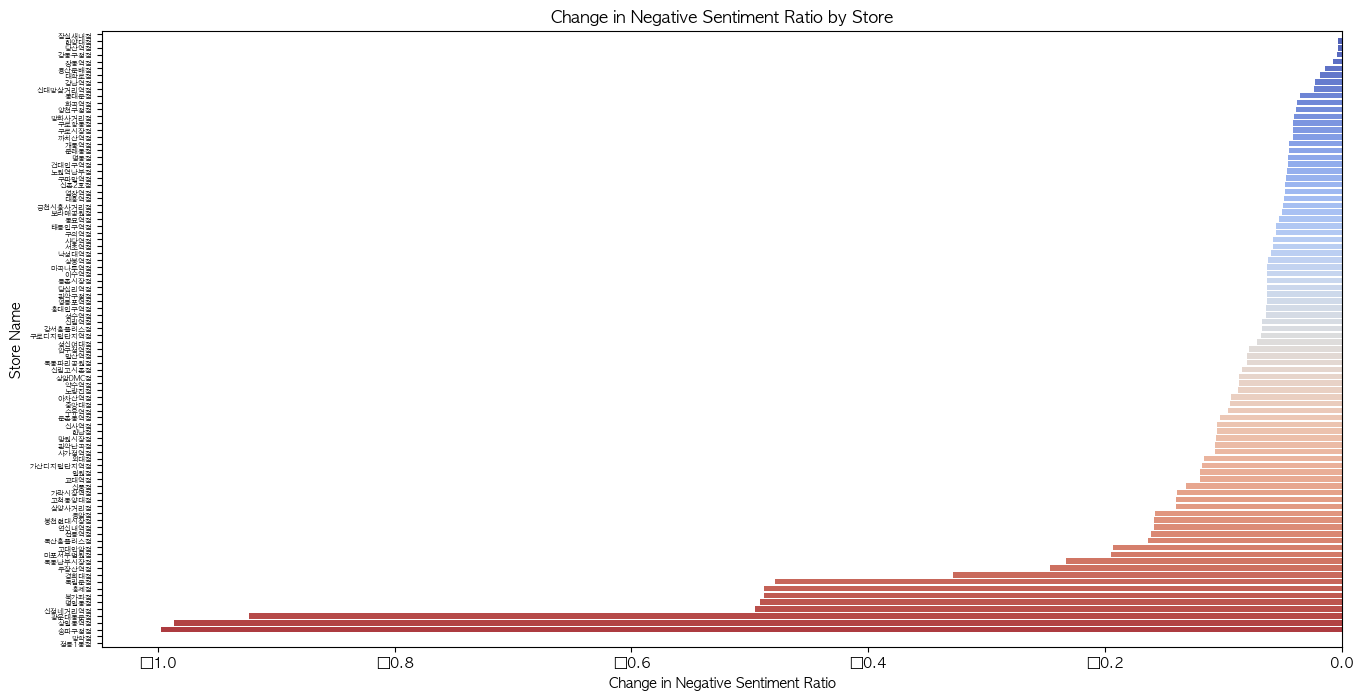

여전히 부정적인 (상위 5개):
store_name
잠실새내점    0.000000
한양대점    -0.003434
당산역점    -0.003882
Name: negative_ratio, dtype: float64

지지부진한 가게 (하위 3개):
store_name
송파구청점   -0.996835
방학점           NaN
정릉1동점         NaN
Name: negative_ratio, dtype: float64


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성 (실제 데이터로 대체해야 함)
before_data = before_KN_review_date_combined
after_data = after_KN_review_date_combined

# 각 가게별, 감정별 빈도 계산
before_counts = before_data.groupby(['store_name', 'classification_result']).size().unstack(fill_value=0)
after_counts = after_data.groupby(['store_name', 'classification_result']).size().unstack(fill_value=0)

# Negative 감정 변화량 계산
before_counts['negative_ratio'] = before_counts['classification_result']=-1 / before_counts.sum(axis=1)
after_counts['negative_ratio'] = after_counts['classification_result']=-1 / after_counts.sum(axis=1)

# 감정 변화량 계산
change = after_counts['negative_ratio'] - before_counts['negative_ratio']
change = change.sort_values(ascending=False)  # 변화량이 큰 순서로 정렬

# 변화량 시각화
plt.figure(figsize=(16, 8))
sns.barplot(x=change.values, y=change.index, palette="coolwarm")
plt.yticks(fontsize=5)
plt.title('Change in Negative Sentiment Ratio by Store')
plt.xlabel('Change in Negative Sentiment Ratio')
plt.ylabel('Store Name')
plt.show()

# 변화량이 가장 큰 상위 3개 가게와 가장 적은 하위 3개 가게 출력
print("여전히 부정적인 (상위 5개):")
print(change.head(3))

print("\n지지부진한 가게 (하위 3개):")
print(change.tail(3))

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# before와 after의 차이 계산
df['change'] = after_KN_review_date_combined['classification_result'] - before_KN_review_date_combined['classification_result']

# 차이가 큰 순으로 정렬
df = df.sort_values(by='change', ascending=False)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 시각화
sns.barplot(x='store_name', y='change', data=df, palette='coolwarm')

# 제목과 라벨 설정
plt.title('Satisfaction Change by Store')
plt.xlabel('Store Name')
plt.ylabel('Change in Satisfaction')

# 그래프 보여주기
plt.show()

ValueError: Could not interpret value `store_name` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

### 시각화

<Axes: xlabel='user_star', ylabel='count'>

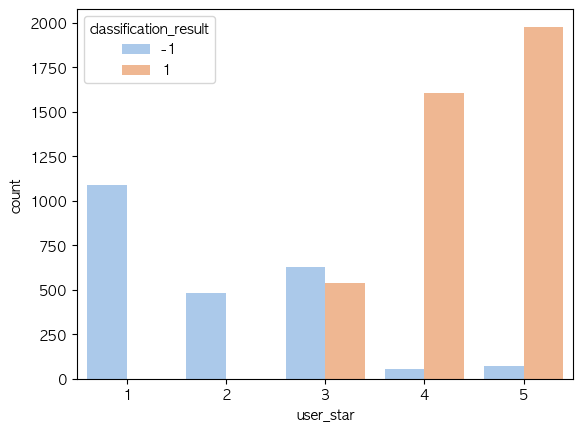

In [107]:
#별점 별 감정분포
import matplotlib as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
sns.countplot(
    x = "user_star",
    palette = "pastel",
    hue = "classification_result",
    data = KG_user_star_combined_df
)

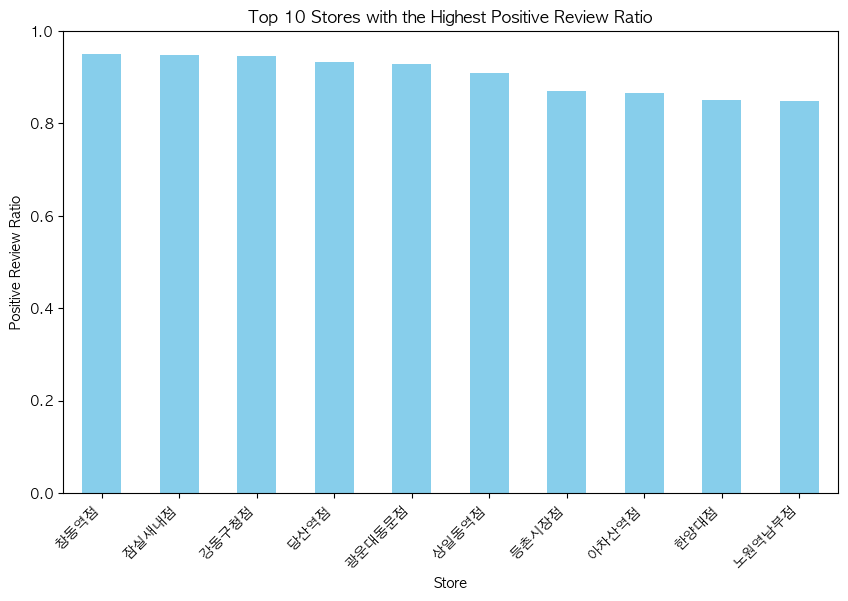

In [205]:
import matplotlib.pyplot as plt

# 매장별 리뷰 카운트
total_reviews = KNG_same_columns_combined_df.groupby('store_name').size()

# 매장별 긍정 리뷰 카운트
positive_reviews = KNG_same_columns_combined_df[KNG_same_columns_combined_df['classification_result'] == 1].groupby('store_name').size()

# 리뷰 건수 대비 긍정 리뷰 비율 계산
positive_ratio = (positive_reviews / total_reviews).fillna(0)

# 상위 10개 매장만 선택
top_10_positive_ratio = positive_ratio.sort_values(ascending=False).head(10)
top_10_positive_reviews = positive_reviews.loc[top_10_positive_ratio.index]

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = top_10_positive_ratio.plot(kind='bar', color='skyblue')

# x축 레이블을 45도 회전
plt.xticks(rotation=45,ha='right')

# 그래프 제목 및 축 레이블 설정
plt.title('Top 10 Stores with the Highest Positive Review Ratio')
plt.xlabel('Store')
plt.ylabel('Positive Review Ratio')

# y축 범위 설정 (0에서 1까지)
plt.ylim(0, 1)

# 그래프 출력
plt.show()

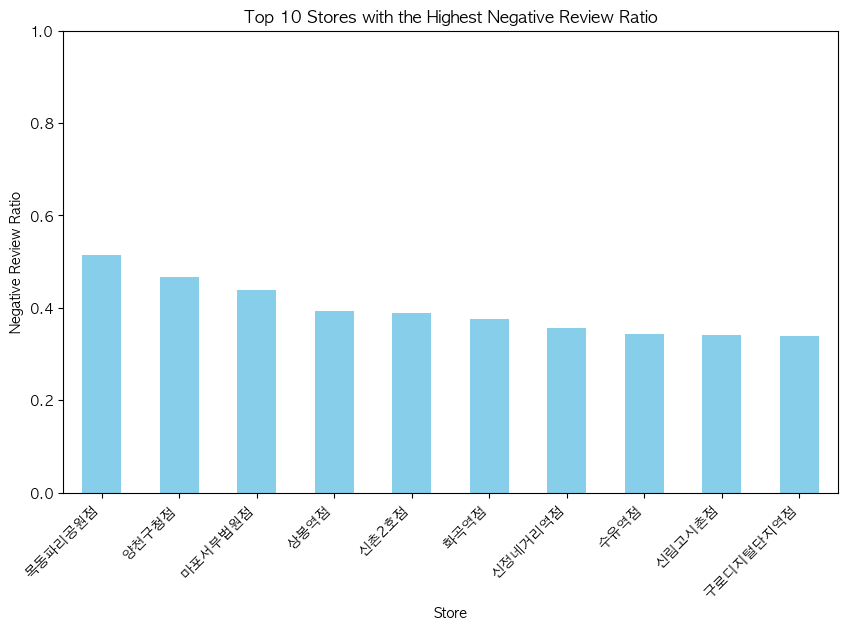

In [204]:
import matplotlib.pyplot as plt

# 매장별 리뷰 카운트
total_reviews = KNG_same_columns_combined_df.groupby('store_name').size()

# 매장별 부정 리뷰 카운트
negative_reviews = KNG_same_columns_combined_df[KNG_same_columns_combined_df['classification_result'] == -1].groupby('store_name').size()

# 리뷰 건수 대비 긍정 리뷰 비율 계산
negative_ratio = (negative_reviews / total_reviews).fillna(0)

# 상위 10개 매장만 선택
top_10_negative_ratio = negative_ratio.sort_values(ascending=False).head(10)
top_10_negative_reviews = negative_reviews.loc[top_10_negative_ratio.index]

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = top_10_negative_ratio.plot(kind='bar', color='skyblue')

# 그래프 제목 및 축 레이블 설정
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stores with the Highest Negative Review Ratio')
plt.xlabel('Store')
plt.ylabel('Negative Review Ratio')

# y축 범위 설정 (0에서 1까지)
plt.ylim(0, 1)


# 그래프 출력
plt.show()

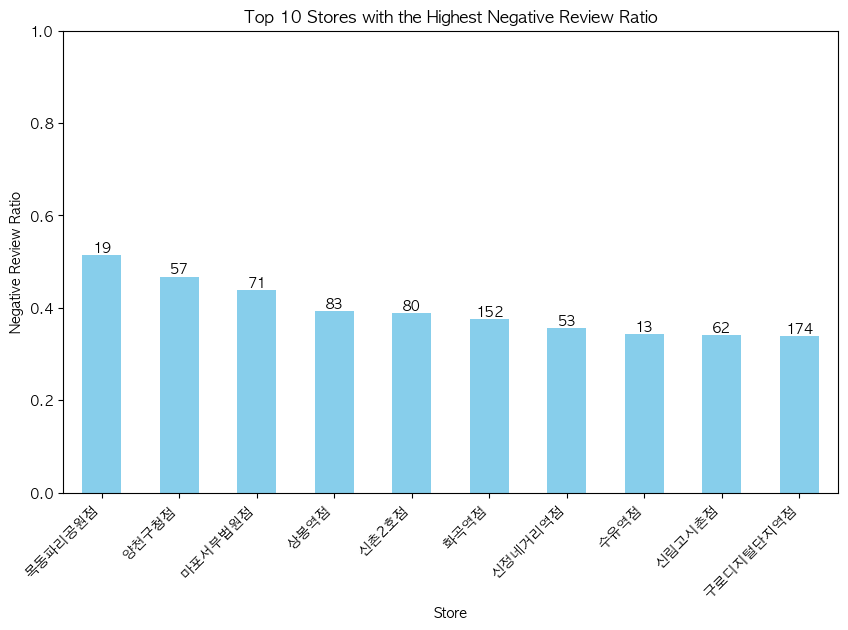

In [131]:
import matplotlib.pyplot as plt

# 매장별 리뷰 카운트
total_reviews = KNG_same_columns_combined_df.groupby('store_name').size()

# 매장별 부정 리뷰 카운트
negative_reviews = KNG_same_columns_combined_df[KNG_same_columns_combined_df['classification_result'] == -1].groupby('store_name').size()

# 리뷰 건수 대비 부정 리뷰 비율 계산
negative_ratio = (negative_reviews / total_reviews).fillna(0)

# 상위 10개 매장만 선택
top_10_negative_ratio = negative_ratio.sort_values(ascending=False).head(10)
top_10_negative_reviews = negative_reviews.loc[top_10_negative_ratio.index]

# 그래프 그리기
plt.figure(figsize=(10, 6))
bars = top_10_negative_ratio.plot(kind='bar', color='skyblue')

# 막대 위에 텍스트 추가 (부정 리뷰 수 표시)
for idx, bar in enumerate(bars.patches):
    height = bar.get_height()  # 막대의 높이 (비율)
    review_count = top_10_negative_reviews.iloc[idx]  # 해당 매장의 부정 리뷰 수
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{review_count}', 
             ha='center', va='bottom', fontsize=10, color='black')

# 그래프 제목 및 축 레이블 설정
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Stores with the Highest Negative Review Ratio')
plt.xlabel('Store')
plt.ylabel('Negative Review Ratio')

# y축 범위 설정 (0에서 1까지)
plt.ylim(0, 1)

# 그래프 출력
plt.show()